# Find PS filter combination that best resembles TESS 

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

from scipy import interpolate

In [3]:
TESS = np.loadtxt('../filters/TESS/TESS.dat')
Kepler = np.loadtxt('../filters/Kepler/Kepler.dat')
PSg = np.loadtxt('../filters/PANSTARRS/PAN-STARRS_PS1_g.dat')
PSr = np.loadtxt('../filters/PANSTARRS/PAN-STARRS_PS1_r.dat')
PSi = np.loadtxt('../filters/PANSTARRS/PAN-STARRS_PS1_i.dat')
PSz = np.loadtxt('../filters/PANSTARRS/PAN-STARRS_PS1_z.dat')
PSy = np.loadtxt('../filters/PANSTARRS/PAN-STARRS_PS1_y.dat')

<IPython.core.display.Javascript object>


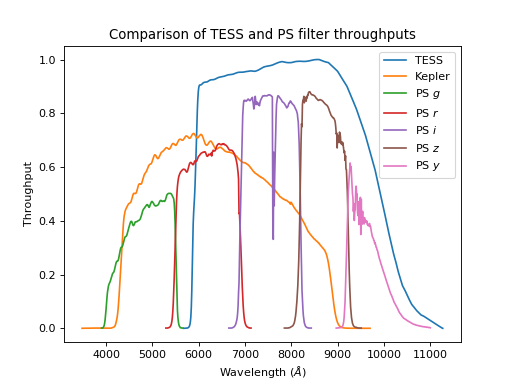

In [4]:
# compare throughputs
plt.figure()
plt.plot(TESS[:,0],TESS[:,1],label = 'TESS', rasterized=True)
plt.plot(Kepler[:,0],Kepler[:,1],label = 'Kepler', rasterized=True)
plt.plot(PSg[:,0],PSg[:,1],label = r'PS $g$', rasterized=True)
plt.plot(PSr[:,0],PSr[:,1],label = r'PS $r$', rasterized=True)
plt.plot(PSi[:,0],PSi[:,1],label = r'PS $i$', rasterized=True)
plt.plot(PSz[:,0],PSz[:,1],label = r'PS $z$', rasterized=True)
plt.plot(PSy[:,0],PSy[:,1],label = r'PS $y$', rasterized=True)
plt.xlabel(r'Wavelength $(\AA)$')
plt.ylabel('Throughput')
plt.legend()
plt.title('Comparison of TESS and PS filter throughputs')
plt.savefig('TESS_PS_filters.pdf', dpi=400)

In [5]:
def Norm(filt):
    f = filt.copy()
    f[:,1] = f[:,1] / np.nanmax(f[:,1])#
    #f[:,1] = f[:,1] / np.trapz(f[:,1],x=f[:,0])
    return f

<IPython.core.display.Javascript object>


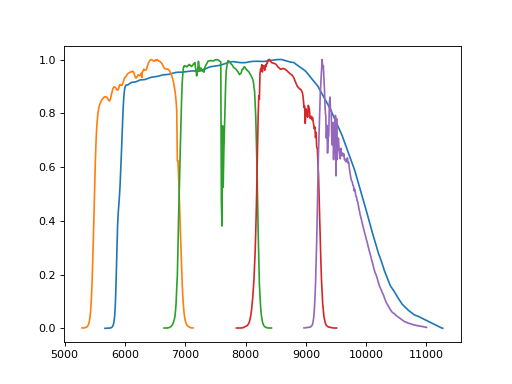

In [6]:
plt.figure()
plt.plot(Norm(TESS)[:,0],Norm(TESS)[:,1])
plt.plot(Norm(PSr)[:,0],Norm(PSr)[:,1])
plt.plot(Norm(PSi)[:,0],Norm(PSi)[:,1])
plt.plot(Norm(PSz)[:,0],Norm(PSz)[:,1])
plt.plot(Norm(PSy)[:,0],Norm(PSy)[:,1])

In [132]:
x = np.arange(np.nanmin(PSr[:,0]),np.max(TESS[:,0]))
psr = interpolate.interp1d(Norm(PSr)[:,0],Norm(PSr)[:,1],bounds_error=False,fill_value=0)
psi = interpolate.interp1d(Norm(PSi)[:,0],Norm(PSi)[:,1],bounds_error=False,fill_value=0)
psz = interpolate.interp1d(Norm(PSz)[:,0],Norm(PSz)[:,1],bounds_error=False,fill_value=0)
psy = interpolate.interp1d(Norm(PSy)[:,0],Norm(PSy)[:,1],bounds_error=False,fill_value=0)
tess = interpolate.interp1d(Norm(TESS)[:,0],Norm(TESS)[:,1],bounds_error=False,fill_value=0)

<IPython.core.display.Javascript object>


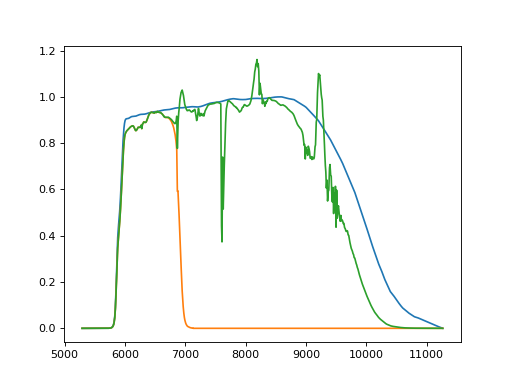

In [110]:
plt.figure()
plt.plot(x,tess(x))
plt.plot(x,psr(x) * tess(x))
#plt.plot(x,psi(x) * tess(x))
#plt.plot(x,psz(x) * tess(x))
#plt.plot(x,psy(x) * tess(x))
plt.plot(x,(psy(x) * tess(x)) + (psz(x) * tess(x)) + (psi(x) * tess(x)) + (psr(x) * tess(x)))

In [111]:
r = np.nansum( psr(x) * tess(x)) / np.nansum(psr(x))
i = np.nansum( psi(x) * tess(x)) / np.nansum(psi(x))
z = np.nansum( psz(x) * tess(x)) / np.nansum(psz(x))
y = np.nansum( psy(x) * tess(x)) / np.nansum(psy(x))

In [112]:
print('r',r)
print('i',i)
print('z',z)
print('y',y)

r 0.6766804426427891
i 0.97513971688656
z 0.9772746798905938
y 0.6725395346093791


# Try fitting

In [135]:
def Filt_fit(coeff, ps1,tess):
    fake = np.nansum(coeff[:,np.newaxis]*ps1,axis=0)
    if (coeff < 0).any():
        residual = np.inf
    else:
        residual = np.nansum(abs(fake - tess))/np.nansum(tess)
        residual = abs(np.trapz(fake) - np.trapz(tess))
    print(residual)
    return residual

In [136]:
ps1 = np.array([psr(x),psi(x),psz(x),psy(x)])
t = tess(x)
coeff = np.array([r,i,z,y])

In [137]:
test = ps1 * coeff[:,np.newaxis]

In [138]:
from scipy.optimize import minimize

In [139]:
res = minimize(Filt_fit,coeff,args=(ps1,t))

437.62047618140014
437.62045654048825
437.62045766484744
437.62046179058734
437.62046701811914
437.62047618140014
1726.7680289943241
1726.7680289943241
1726.768048635237
1726.7680475108778
1726.768043385137
1726.7680381576051
10.076416908259944
10.076416908259944
10.07643654917274
10.076435424813553
10.076431299073647
10.076426071541846
213.77203579716797
213.77203579716797
213.7720161562561
213.77201728061527
213.77202140635472
213.77202663388698
23.649825324986068
23.649825324986068
23.64980568407418
23.649806808433368
23.64981093417282
23.649816161705076
1.1425446673488295
1.1425446673488295
1.1425643082616261
1.1425631839019843
1.1425590581620781
1.1425538306298222
15.22041952759264
15.22041952759264
15.220399886679843
15.220401011039485
15.22040513677939
15.220410364311192
1.4346862143097496
1.4346862143097496
1.434666573396953
1.4346676977561401
1.4346718234960463
1.4346770510283022
0.06704258663603468
0.06704258663603468
0.0670622275479218
0.0670611031887347
0.0670569774492833
0

6.027676136000082e-09
6.027676136000082e-09
1.9634884210972814e-05
1.851052547863219e-05
1.4384785117727006e-05
9.15725331651629e-06
6.027676136000082e-09
6.027676136000082e-09
1.9634884210972814e-05
1.851052547863219e-05
1.4384785117727006e-05
9.15725331651629e-06
6.027676136000082e-09
6.027676136000082e-09
1.9634884210972814e-05
1.851052547863219e-05
1.4384785117727006e-05
9.15725331651629e-06
6.027676136000082e-09
6.027676136000082e-09
1.9634884210972814e-05
1.851052547863219e-05
1.4384785117727006e-05
9.15725331651629e-06
6.027676136000082e-09
6.027676136000082e-09
1.9634884210972814e-05
1.851052547863219e-05
1.4384785117727006e-05
9.15725331651629e-06
6.027676136000082e-09
6.027676136000082e-09
1.9634884210972814e-05
1.851052547863219e-05
1.4384785117727006e-05
9.15725331651629e-06
6.027676136000082e-09
6.027676136000082e-09
1.9634884210972814e-05
1.851052547863219e-05
1.4384785117727006e-05
9.15725331651629e-06
6.027676136000082e-09
6.027676136000082e-09
1.9634884210972814e-05
1.

In [143]:
res.x

array([0.80228678, 1.0935556 , 1.06930582, 0.73114007])

In [141]:
fake = np.nansum(coeff[:,np.newaxis]*ps1,axis=0)
fit = np.nansum(res.x[:,np.newaxis]*ps1,axis=0)

<IPython.core.display.Javascript object>


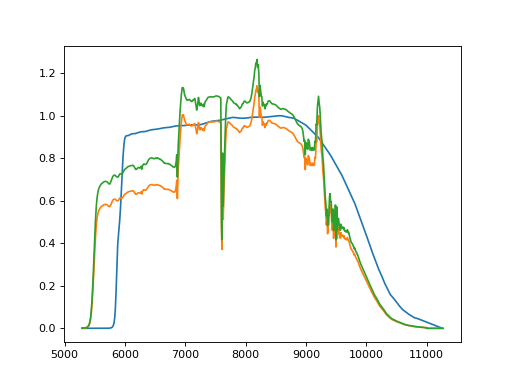

In [142]:
plt.figure()
plt.plot(x,tess(x))
plt.plot(x,fake)
plt.plot(x,fit)

In [114]:
np.nansum(abs(fake - tess(x)))/np.nansum(tess(x))

0.6892822461471647

In [81]:
np.sum(fit)/np.sum(t)

1.0662240201890072

In [130]:
filt.shape

(5980, 2)

In [134]:
filt = np.array([x,fake]).T
np.savetxt('../../source_synphot/source_synphot/passbands/TESS/ps1_tess.dat',filt)